In [1]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import repeat
import pickle

In [2]:
df = pd.read_excel('/home/srishti/Downloads/Online Retail.xlsx')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [7]:
# def rstr(df, pred=None): 
#     obs = df.shape[0]
#     types = df.dtypes
#     counts = df.apply(lambda x: x.count())
#     uniques = df.apply(lambda x: [x.unique()])
#     nulls = df.apply(lambda x: x.isnull().sum())
#     distincts = df.apply(lambda x: x.nunique())
#     missing_ratio = (df.isnull().sum()/ obs) * 100
#     skewness = df.skew()
#     kurtosis = df.kurt() 
#     print('Data shape:', df.shape)
#     print(len(types))
#     print(len(uniques))
#     print(uniques)
#     if pred is None:
#         cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'uniques', 'skewness', 'kurtosis']
#         str_ = pd.DataFrame([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis])

#     else:
#         corr = df.corr()[pred]
#         str_ = pd.merge([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
#         corr_col = 'corr '  + pred
#         cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
#     print(str_.shape)
#     str_.columns = cols
#     dtypes = str_.types.value_counts()
#     print('___________________________\nData types:\n',str_.types.value_counts())
#     print('___________________________')
#     return str_

# details = rstr(df)
# display(details)

In [11]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
#     print(len(missing_ration))
#     print(len(uniques))
#     print(uniques)
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration',  'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, skewness, kurtosis], axis = 1, sort=True)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
        corr_col = 'corr '+ pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

details = rstr(df)
display(details.sort_values(by='missing ration', ascending=False))


Data shape: (541909, 8)
___________________________
Data types:
 object            4
float64           2
int64             1
datetime64[ns]    1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,skewness,kurtosis
CustomerID,float64,406829,4373,135080,24.926694,0.029835,-1.179982
Description,object,540455,4224,1454,0.268311,NaN,NaN
Country,object,541909,38,0,0.000000,NaN,NaN
InvoiceDate,datetime64[ns],541909,23260,0,0.000000,NaN,NaN
InvoiceNo,object,541909,25900,0,0.000000,NaN,NaN
Quantity,int64,541909,722,0,0.000000,-0.264076,119769.160031
StockCode,object,541909,4070,0,0.000000,NaN,NaN
UnitPrice,float64,541909,1630,0,0.000000,186.506972,59005.719097


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
df = df[~(df.CustomerID.isnull())]  #Remove the rows if the customer ID is null
df = df[~(df.Quantity<0)]  #Remove the rows with negative Quantity
df = df[df.UnitPrice>0]  #Consider only rows where unit price of the item is greater than 0.
details = rstr(df)
display(details.sort_values(by='distincts', ascending=False))

Data shape: (397884, 8)
___________________________
Data types:
 object            4
float64           2
int64             1
datetime64[ns]    1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,skewness,kurtosis
InvoiceNo,object,397884,18532,0,0.0,-0.178524,-1.200748
InvoiceDate,datetime64[ns],397884,17282,0,0.0,NaN,NaN
CustomerID,float64,397884,4338,0,0.0,0.025729,-1.180822
Description,object,397884,3877,0,0.0,NaN,NaN
StockCode,object,397884,3665,0,0.0,NaN,NaN
UnitPrice,float64,397884,440,0,0.0,204.032727,58140.396673
Quantity,int64,397884,301,0,0.0,409.892972,178186.243253
Country,object,397884,37,0,0.0,NaN,NaN


Problems with the Dataset
1. More number of unique descriptions than there are unique stock codes


In [7]:
cat_des_df = df.groupby(["StockCode","Description"]).count().reset_index()
display(cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head())
df[df['StockCode'] == df.StockCode.value_counts()[df.StockCode.value_counts()>1].reset_index()['index'][4]]['Description'].unique()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,85172,5


array(['LUNCH BAG RED RETROSPOT', 'LUNCH BAG RED SPOTTY'], dtype=object)

In [8]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df['amount'] = df.Quantity*df.UnitPrice
df.CustomerID = df.CustomerID.astype('Int64')

In [9]:
df.drop(df[df['Quantity']<0].index,inplace=True)

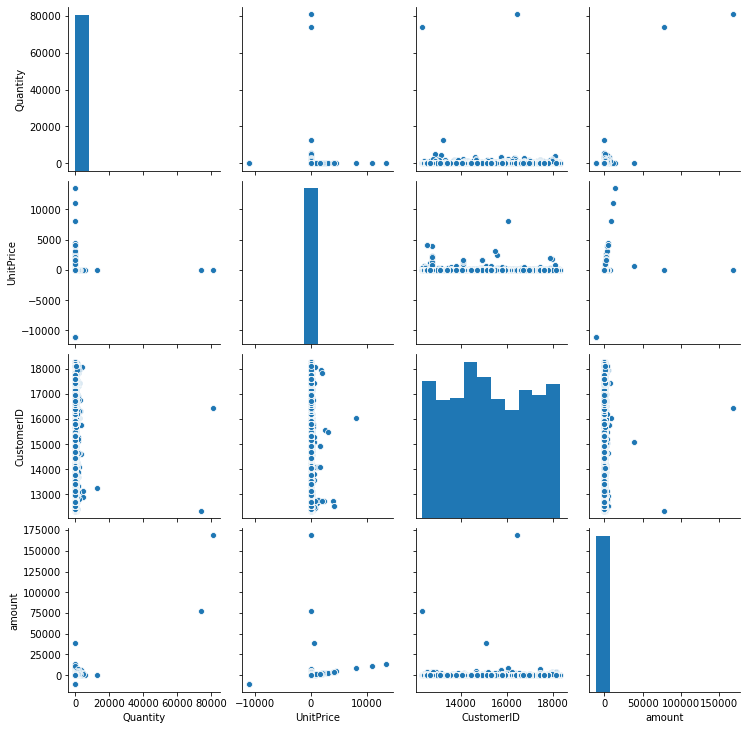

In [10]:
sns.pairplot(df)

In [11]:
df.drop(df[df['UnitPrice']<=0].index, inplace = True)
df.drop(df[df['CustomerID']=="Nan"].index, inplace = True)
df[df['Quantity']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount


# RFM Analysis

In [12]:
from datetime import date
today = date.today()
print(today)

2021-04-08


In [13]:
df['Recency'] = list(map(lambda x: (today - x.date()).days,df['InvoiceDate']))


In [16]:
# df.groupby(["CustomerID","InvoiceNo"]).count()

In [14]:
df_copy = df
df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
df_copy['Frequency']= df_copy.groupby(by=['CustomerID'], as_index = False)['InvoiceNo'].count()['InvoiceNo']
# df_copy.head(20)


In [15]:
cs_df = df
customer_freq = (cs_df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
print(customer_freq[customer_freq['CustomerID']==12747])

df[df['CustomerID']==12347]
# customer_history_df = customer_history_df.merge(customer_freq)

     CustomerID  frequency
325       12747         11


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Recency,Frequency
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,25.20,3775,NaN
72246,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347,Iceland,20.40,3725,NaN
148285,549222,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-04-07 10:43:00,4.25,12347,Iceland,17.00,3654,NaN
220572,556201,23084,RABBIT NIGHT LIGHT,12,2011-06-09 13:01:00,2.08,12347,Iceland,24.96,3591,NaN
286621,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347,Iceland,13.20,3537,NaN
428957,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,2011-10-31 12:25:00,3.75,12347,Iceland,45.00,3447,NaN
535004,581180,23497,CLASSIC CHROME BICYCLE BELL,12,2011-12-07 15:52:00,1.45,12347,Iceland,17.40,3410,NaN


In [16]:
cs_df.drop(cs_df[cs_df['CustomerID'].isnull()].index, axis = 0, inplace = True)

In [17]:
monetary_value = cs_df.groupby(by = "CustomerID",as_index = False).agg({'amount': 'sum'})
rfm = pd.merge(customer_freq, monetary_value, on='CustomerID')
rfm = pd.merge(cs_df[['CustomerID','Recency']],rfm, on = 'CustomerID')
rfm.drop_duplicates(subset=['CustomerID'], keep="first", inplace=True)
rfm.reset_index(drop = True, inplace = True)
rfm.head(20)

,CustomerID,Recency,frequency,amount
0,17850,3781,34,503.28
1,13047,3781,10,203.53
2,12583,3781,15,617.80
3,13748,3781,5,255.41
4,15100,3781,3,876.00
5,15291,3781,15,1082.09
6,14688,3781,21,798.73
7,17809,3781,12,1988.24
8,15311,3781,91,4709.93
9,16098,3781,7,344.55


In [18]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles


,CustomerID,Recency,frequency,amount
0.25,13813.25,3520.0,1.0,17.7000
0.50,15299.5,3656.0,2.0,47.0500
0.75,16778.75,3734.0,5.0,130.1025


In [19]:
import pickle
pickle_out = open("/home/srishti/PycharmProjects/Ecom for MP/rfm_scores.pickle",'wb')
pickle.dump(quantiles, pickle_out)
pickle_out.close()

In [20]:
def RScore(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.5]:
        return 3
    elif x <= quantiles['Recency'][0.75]: 
        return 2
#     elif x <= quantiles['Recency'][0.8]: 
#         return 1
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,col):
    if x <= quantiles[col][0.25]:
        return 1
    elif x <= quantiles[col][0.5]:
        return 2
    elif x <= quantiles[col][0.75]: 
        return 3
#     elif x<= quantiles[col][0.8]:
#         return 4
    else:
        return 4
rfm['R_Score'] = list(map(RScore,rfm['Recency']))
rfm['F_Score'] = list(map(FMScore,rfm['frequency'],repeat('frequency')))
rfm['M_Score'] = list(map(FMScore,rfm['amount'],repeat('amount')))
rfm.head()

,CustomerID,Recency,frequency,amount,R_Score,F_Score,M_Score
0,17850,3781,34,503.28,1,4,4
1,13047,3781,10,203.53,1,4,4
2,12583,3781,15,617.80,1,4,4
3,13748,3781,5,255.41,1,3,4
4,15100,3781,3,876.00,1,3,4


In [21]:
# def RScore(x):
#     if x <= quantiles['Recency'][0.2]:
#         return 5
#     elif x <= quantiles['Recency'][0.4]:
#         return 4
#     elif x <= quantiles['Recency'][0.6]: 
#         return 3
#     elif x <= quantiles['Recency'][0.8]: 
#         return 2
#     else:
#         return 1
# # Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
# def FMScore(x,col):
#     if x <= quantiles[col][0.2]:
#         return 1
#     elif x <= quantiles[col][0.4]:
#         return 2
#     elif x <= quantiles[col][0.6]: 
#         return 3
#     elif x<= quantiles[col][0.8]:
#         return 4
#     else:
#         return 5
# rfm['R_Score'] = list(map(RScore,rfm['Recency']))
# rfm['F_Score'] = list(map(FMScore,rfm['frequency'],repeat('frequency')))
# rfm['M_Score'] = list(map(FMScore,rfm['amount'],repeat('amount')))
# rfm.head()

In [22]:
rfm_scores = rfm.iloc[:,4:]
rfm_scores

,R_Score,F_Score,M_Score
0,1,4,4
1,1,4,4
2,1,4,4
3,1,3,4
4,1,3,4
...,...,...,...
4333,4,1,1
4334,4,1,1
4335,4,1,3
4336,4,1,1


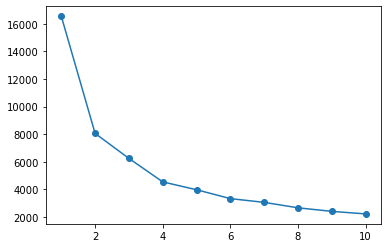

In [23]:
sumofsquares = []
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 1231).fit(rfm_scores)
    sumofsquares.append(km.inertia_)
plt.plot(range(1,11),sumofsquares,marker = 'o')
plt.show()

[[1.61279461 1.74747475 1.79124579]
 [1.40420372 3.60145513 3.59013743]
 [3.60159652 1.28301887 1.52104499]
 [3.26081731 2.74639423 3.24519231]]


Text(0.5, 0, 'Monetary')

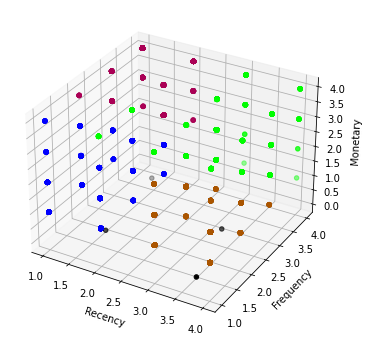

In [24]:
#optimal k=4
from mpl_toolkits.mplot3d import Axes3D
model = KMeans(n_clusters = 4, random_state = 1231).fit(rfm_scores)
centers = model.cluster_centers_
print(centers)
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(rfm_scores.iloc[:,0],rfm_scores.iloc[:,1],rfm_scores.iloc[:,2],cmap = "brg",
          c = model.predict(rfm_scores.iloc[:,0:]))
ax.scatter(centers[:,0],centers[:,1],c = 'black')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

In [25]:
#Recency: 

x = model.predict(rfm_scores.iloc[:,0:])
print((rfm_scores[x==0]))
print(len(rfm_scores[x==1]))
print(len(rfm_scores[x==2]))
print(len(rfm_scores[x==3]))

      R_Score  F_Score  M_Score
10          1        1        2
13          1        2        2
17          1        1        3
22          1        3        2
24          1        1        4
...       ...      ...      ...
2161        2        3        2
2162        2        1        1
2163        2        1        1
2164        2        3        1
2165        2        1        2

[891 rows x 3 columns]
1237
1378
832


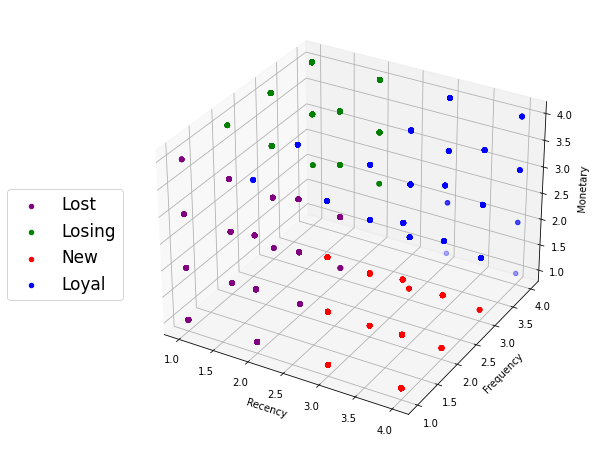

In [29]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
# ax.xaxis.pane.set_edgecolor('black')
# ax.yaxis.pane.set_edgecolor('black')
# ax.zaxis.pane.set_edgecolor('black')
# ax.grid(False)
# ax.w_xaxis.set_pane_color('')
# ax.set(facecolor = 'black')
a1 = ax.scatter(rfm_scores.iloc[:,0][x==0],rfm_scores.iloc[:,1][x==0],rfm_scores.iloc[:,2][x==0],color = "purple")
a2 = ax.scatter(rfm_scores.iloc[:,0][x==1],rfm_scores.iloc[:,1][x==1],rfm_scores.iloc[:,2][x==1],color = "green")
a3 = ax.scatter(rfm_scores.iloc[:,0][x==2],rfm_scores.iloc[:,1][x==2],rfm_scores.iloc[:,2][x==2],color = "red")
a4 = ax.scatter(rfm_scores.iloc[:,0][x==3],rfm_scores.iloc[:,1][x==3],rfm_scores.iloc[:,2][x==3],color = "blue")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend([a1,a2,a3,a4],['Lost','Losing','New','Loyal'], loc = 'best',bbox_to_anchor=(0, 0.6), prop={'size':17})
# ax.scatter(centers[:,0],centers[:,1],centers[:,2],c = 'black')
#CLuster 0: Recency: Low, Frequency: Low to high,Monetary: Low to med ----Lost 
#CLuster 1: Recency: Low, Frequency: Med to high,Monetary: Med to high ----Losing
#CLuster 2: Recency: Med to high, Frequency: Low to med,Monetary: Low -----New
#CLuster 3: Recency: Med to high, Frequency: high,Monetary: Low to high  -----Loyal


In [30]:
with open('/home/srishti/PycharmProjects/Ecom for MP/clusters_3d.pickle', 'wb') as f: # should be 'wb' rather than 'w'
    pickle.dump(fig, f) 

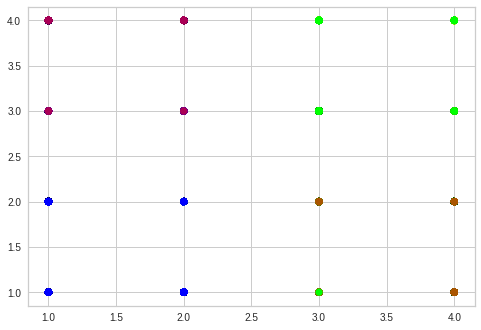

In [35]:
plt.scatter(rfm_scores.iloc[:,0],rfm_scores.iloc[:,1],cmap = 'magma', c = model.predict(rfm_scores.iloc[:,0:]))
plt.scatter(rfm_scores.iloc[:,0],rfm_scores.iloc[:,2],cmap = "viridis", c = model.predict(rfm_scores.iloc[:,0:]))
plt.scatter(rfm_scores.iloc[:,0],rfm_scores.iloc[:,1],cmap = 'brg', c = model.predict(rfm_scores.iloc[:,0:]))


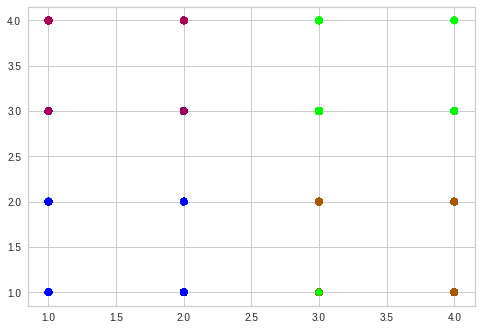

In [79]:
plt.scatter(rfm_scores.iloc[:,0],rfm_scores.iloc[:,1],cmap = 'brg', c = model.predict(rfm_scores.iloc[:,0:]))


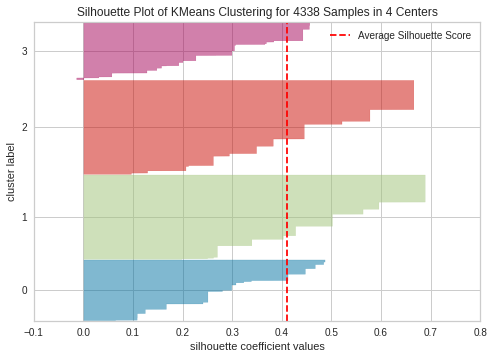

In [33]:
from yellowbrick.cluster import silhouette_visualizer
x = silhouette_visualizer(KMeans(n_clusters = 4, random_state = 1231),rfm_scores, colors = 'yellowbrick')

In [31]:
with open('/home/srishti/PycharmProjects/Ecom for MP/silhoutte.pickle', 'wb') as f: # should be 'wb' rather than 'w'
    pickle.dump(x, f) 

In [72]:
#CLuster 0: Recency: Low, Frequency: Low to high,Monetary: Low to high
#CLuster 1: Recency: Low, Frequency: Low to high,Monetary: Low to high
#CLuster 2: Recency: Low, Frequency: Low to high,Monetary: Low to high
#CLuster 3: Recency: Low, Frequency: Low to high,Monetary: Low to high


<!-- Cluster 0: High Recency, Low Monetary Value - New Customers
Cluster 1: Low to medium Recency, Low to medium Monetary Value, Low to medium frequency - On the verge of losing
Cluster 2: High Recency, High Frequency, High Monetary Value - Star Customers
Cluster 3: Low Recency, High Frequency, Low to High Monetary Value - Lost
 -->
CLUSTER 0: Low recency, freq: med to high, monetary: med to high
CLUSTER 1: Low to med recency, low to med freq, low to med monetary
CLUSTER 2: Med to high recency, low to high freq, low to med monetary
CLUSTER 3: Med to high recency, high freq, med to high monetary

Strategy
=
1. Reward new customers 
2. Show premium products to Star Customers
3. Show offers and best deals to Cluster1
4. Don't market about Lost Customers.

In [74]:
# CLUSTER 0: Low to med recency, freq: med to high, monetary: med to high

In [32]:
pd.to_pickle(model,'/home/srishti/PycharmProjects/Ecom for MP/new_model.pickle')
model = pd.read_pickle(r'/home/srishti/PycharmProjects/Ecom for MP/new_model.pickle') 
r = float(input("Enter Recency "))
f = float(input("Enter Frequency "))
m = float(input("Enter Monetart "))

result = model.predict([[r,f,m]])  # input must be 2D array
print(result)

KeyboardInterrupt: Interrupted by user

In [ ]:
##For Website, we can't make the customer actually pay using paypal, so create a coupon code,
##which when applied, the customer gets the order for free.
##Create Shipped Orders Model for the orders that are actually checked out(using that coupon code).
##Right now, we assume the cart orders to have been checked out and try to apply RFM on those Customers.
##Also, create a login and signup page.